In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression,LassoCV,SGDClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from tqdm import tqdm
%matplotlib inline
from imblearn.over_sampling import SMOTE
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV,RFE
from prettytable import PrettyTable 
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)

data_test_1=data_test.drop(['id'],axis=1)

In [4]:
data_2=data.drop(['id'],axis=1)
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [5]:
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [6]:
y=data_2['target'].values
X=data_2.drop(['target'],axis=1)

In [7]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=30)
print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(175, 300) (175,)
(75, 300) (75,)


Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format: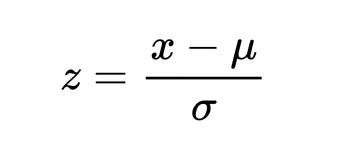

In [9]:
def standard_scaler(X_train,X_test,data_test_final):
    standard_scaler=StandardScaler()
    X_train=standard_scaler.fit_transform(X_train)
    X_test=standard_scaler.transform(X_test)
    test=standard_scaler.transform(data_test_final)
    data_train=pd.DataFrame(X_train)
    data_test=pd.DataFrame(X_test)
    data_test_final_dataframe=pd.DataFrame(test)
    
    return X_train,X_test,data_train,data_test,data_test_final_dataframe

In [10]:
def oversampled_ss(X_train,y_train):
    smote=SMOTE()
    X_train_os,y_train_os=smote.fit_resample(X_train,y_train)
    return X_train_os,y_train_os

In [11]:
def feature_enginnering(data_1,data_2):
    data_2['mean']=np.mean(data_1,axis=1)
    data_2['std_dev']=np.std(data_1,axis=1)
    data_2['variance']=np.var(data_1,axis=1)
    data_2['median']=np.median(data_1,axis=1)
    
    sine_standard_scaler=np.sin(data_1)
    cosine_standard_scaler=np.cos(data_1)
    tan_standard_scaler=np.tan(data_1)
    sinh_standard_scaler=np.sinh(data_1)
    cosh_standard_scaler=np.cosh(data_1)
    tanh_standard_scaler=np.tanh(data_1)
    
    data_2['sine']=np.mean(sine_standard_scaler,axis=1)
    data_2['cosine']=np.mean(cosine_standard_scaler,axis=1)
    data_2['tan']=np.mean(tan_standard_scaler,axis=1)
    data_2['sinh']=np.mean(sinh_standard_scaler,axis=1)
    data_2['cosh']=np.mean(cosh_standard_scaler,axis=1)
    data_2['tanh']=np.mean(tanh_standard_scaler,axis=1)

    data_2['std_sine']=np.std(sine_standard_scaler,axis=1)
    data_2['std_cosine']=np.std(cosine_standard_scaler,axis=1)
    data_2['std_tan']=np.std(tan_standard_scaler,axis=1)
    data_2['std_sinh']=np.std(sinh_standard_scaler,axis=1)
    data_2['std_cosh']=np.std(cosh_standard_scaler,axis=1)
    data_2['std_tanh']=np.std(tanh_standard_scaler,axis=1)


    data_2['var_sine']=np.var(sine_standard_scaler,axis=1)
    data_2['var_cosine']=np.var(cosine_standard_scaler,axis=1)
    data_2['var_tan']=np.var(tan_standard_scaler,axis=1)
    data_2['var_sinh']=np.var(sinh_standard_scaler,axis=1)
    data_2['var_cosh']=np.var(cosh_standard_scaler,axis=1)
    data_2['var_tanh']=np.var(tanh_standard_scaler,axis=1)


    data_2['median_sine']=np.median(sine_standard_scaler,axis=1)
    data_2['median_cosine']=np.median(cosine_standard_scaler,axis=1)
    data_2['median_tan']=np.median(tan_standard_scaler,axis=1)
    data_2['median_sinh']=np.median(sinh_standard_scaler,axis=1)
    data_2['mediam_cosh']=np.median(cosh_standard_scaler,axis=1)
    data_2['median_tanh']=np.median(tanh_standard_scaler,axis=1)


    data_2['mean_square']=np.mean(np.power(data_1,2),axis=1)
    data_2['mean_cube']=np.mean(np.power(data_1,3),axis=1)
    data_2['mean_four']=np.mean(np.power(data_1,4),axis=1)
    
    exp_standard_scaler=np.exp(data_1)
    exp2_standard_scaler=np.exp2(data_1)
    expm1_standard_scaler=np.expm1(data_1)
    
    data_2['mean_exp']=np.mean(exp_standard_scaler,axis=1)
    data_2['mean_exp2']=np.mean(exp2_standard_scaler,axis=1)
    data_2['mean_expm']=np.mean(expm1_standard_scaler,axis=1)

    data_2['median_exp']=np.median(exp_standard_scaler,axis=1)
    data_2['median_exp2']=np.median(exp2_standard_scaler,axis=1)
    data_2['median_expm']=np.median(expm1_standard_scaler,axis=1)

    data_2['std_exp']=np.std(exp_standard_scaler,axis=1)
    data_2['std_exp2']=np.std(exp2_standard_scaler,axis=1)
    data_2['std_expm']=np.std(expm1_standard_scaler,axis=1)


    data_2['var_exp']=np.var(exp_standard_scaler,axis=1)
    data_2['var_exp2']=np.var(exp2_standard_scaler,axis=1)
    data_2['var_expm']=np.var(expm1_standard_scaler,axis=1)
    
    # calcualting mean absolute deviation
    data_2['mad']=data_1.mad(axis=1)
    
    data_new=pd.DataFrame()
    for i in data_1.columns.values:
        data_new[int(i)]=data_1.iloc[:,int(i)]+abs(data_1.iloc[:,int(i)].min())     
    data_new_square=np.sqrt(data_new)
    data_2['square_root_mean']=np.mean(data_new,axis=1)
    data_2['square_root_median']=np.median(data_new,axis=1)
    data_2['square_root_std_dev']=np.std(data_new,axis=1)
    data_2['square_root_var']=np.var(data_new,axis=1)
    
    return data_2

    

In [12]:
def parameters_models(model,param,X,y):
    best_cv=StratifiedKFold(n_splits=3)
    classifier=GridSearchCV(model,param,cv=best_cv,n_jobs=-1,scoring='roc_auc',return_train_score=True,verbose=1)
    classifier.fit(X,y)
    train_auc=classifier.cv_results_['mean_train_score']
    train_auc_std=classifier.cv_results_['std_train_score']
    cv_auc = classifier.cv_results_['mean_test_score'] 
    cv_auc_std= classifier.cv_results_['std_test_score']

    print("best alpha/parameter",classifier.best_params_)
    
    return classifier
    

In [13]:
def modelling(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)

    y_train_pred=model.predict_proba(X_train)
    y_train_pred = y_train_pred[:, 1]

    y_test_pred=model.predict_proba(X_test)
    y_test_pred=y_test_pred[:,1]
    
    return y_train_pred,y_test_pred,model

In [14]:
def calibrated(model,X_train,y_train,X_test):
    calib = CalibratedClassifierCV(model, cv='prefit')
    model=calib.fit(X_train,y_train)
    
    y_train_pred=model.predict_proba(X_train)
    y_train_pred = y_train_pred[:, 1]

    y_test_pred=model.predict_proba(X_test)
    y_test_pred=y_test_pred[:,1]
    
    return y_train_pred,y_test_pred,model

In [15]:
def calibrated_full(model,X_train,y_train,X_test):
    calib = CalibratedClassifierCV(model, cv='prefit')
    model=calib.fit(X_train,y_train)
    y_test_pred=model.predict_proba(X_test)
    y_test_pred=y_test_pred[:,1]
    
    return y_test_pred,model

In [16]:
def roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred):

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("AUC")
    plt.grid()
    plt.show()
    
    auc_list=[auc(train_fpr, train_tpr),auc(test_fpr, test_tpr)]
    
    return auc_list
    

In [17]:
def feature_selection(model,X,y):
    rfecv=RFECV(model,step=10,min_features_to_select=40,cv=best_cv,verbose=1,scoring='roc_auc',n_jobs=-1)
    rfecv.fit(X,y)
    print("Optimal Feature",rfecv.n_features_)
    print("Feature_names",rfecv.get_feature_names_out())
    
    return rfecv.support_
    

In [18]:
def box_cox_transformation(train_dataframe,test_dataframe,original_test):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_test_box=power_transformer.transform(test_dataframe)
    final_dataframe_original_test_box=power_transformer.transform(original_test)
    
    return final_dataframe_train_box,final_dataframe_test_box,final_dataframe_original_test_box

In [19]:
def box_cox_transformation1(train_dataframe,original_test):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_original_test_box=power_transformer.transform(original_test)
    
    return final_dataframe_train_box,final_dataframe_original_test_box

In [20]:
X_train_ss,X_test_ss,df_train_ss,df_test_ss,df_test_final=standard_scaler(X_train,X_test,data_test_1)
print(df_test_final.shape)

(19750, 300)


In [21]:
x_train = data.drop(['id', 'target'], axis=1)
y_train_1 = data['target']

x_test = data_test.drop(['id'], axis=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape

(250, 300)

## Used Tree base methods because because they are giving good results

## Flow Chart

The models used in this notebook are:

1.Logistic Regression

2.Decision Tree

3.SVClassifier

4.Random Forest

5.XGboost

6.SGD with logloss

7.SGD with hingeloss

8.SGD with modified huber loss

1.Used decision tree as base model to take out important features with feature selection technique called RFECV and made dataframe of that reduced feature.

2.Made models without hyperparameter tuning on reduced feature set and made again those models with hyperparameter tuning.
This comprises of DATASET 1

1.Done feature enginnering on original X_train and X_test dataset and then standardize it.

2.Run all models with enginnered features.This comprises of DATASET 2.


1.Take the reduced feature dataset and done feature transformation (box_cox transformation) with standardization.This comprises of our DATASET 3.


1.Take the original features which are standardize earlier done PCA on top of it.Taken all those features which preserve 99% variance of data.This comprises of DATASET 4

1.Done oversampling on original train and standardize it.Get all the important feature through RFECV using decison tree as base model.

2.Done feature enginnering on train oversampled and standardize it.

3.Made all models.This comprises of our DATASET 5

1.Done PCA on reduced feature set which i got earlier through logistic regression and got only those components which preserve 99% variance of data.

2.Made all models on it.This Comprises of DATASET 6

1.Made a new dataset called DATASET 7 which is same as of DATASET 3 but in this dataset feature transformation is done on reduced feature which i got from oversampled dataset

## DATASET 1-Reduced featureset using RFECV along with standardization

## decison Tree using RFECV

We have selected feature using wrapper technique called RFECV

RFECV=Recursive Feature Elimination using Cross Validation

It is a Wrapper technique.

I will take the reduced features from decision tree i get and will made models

I will make each models with deafault values and using hyperparameter tuning

In [22]:
data_1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=300)

In [23]:
dictionary_values={}
for i in data_1.columns:
    list1=[]
    list1.append(max(data_1[i])+abs(max(data_1[i]))*0.2)    
    list1.append(min(data_1[i])-abs(min(data_1[i]))*0.2)  
    dictionary_values[i]=list1
print(dictionary_values)
print(len(dictionary_values))
  

{'0': [3.0803999999999996, -2.7828], '1': [2.9028, -3.5172], '2': [4.0704, -2.9724], '3': [3.3252000000000006, -2.8308], '4': [3.4812000000000003, -3.0792], '5': [3.3516000000000004, -3.414], '6': [3.0551999999999997, -3.5712000000000006], '7': [3.4152, -4.1328], '8': [3.0144, -3.3216], '9': [3.5507999999999997, -2.8331999999999997], '10': [3.9252000000000002, -3.9624], '11': [3.5976000000000004, -3.4212000000000007], '12': [3.2747999999999995, -3.2172], '13': [3.1812000000000005, -3.1152], '14': [3.4956000000000005, -3.9299999999999997], '15': [3.0096, -4.2144], '16': [3.9432, -2.9712], '17': [2.9160000000000004, -4.3427999999999995], '18': [3.0684, -2.9135999999999997], '19': [3.4416, -3.8747999999999996], '20': [3.2436000000000003, -3.6287999999999996], '21': [3.2292000000000005, -3.33], '22': [3.1247999999999996, -3.5544], '23': [2.8344, -2.9880000000000004], '24': [3.5124, -3.7283999999999997], '25': [3.5712000000000006, -3.5316], '26': [3.0972000000000004, -3.5196000000000005], '

In [25]:
import pickle 
with open("dictionary_values.pkl", "wb") as file:
    pickle.dump(dictionary_values, file, pkl.HIGHEST_PROTOCOL)

In [39]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w=np.zeros_like(dim)
    b=0
    return w,b

In [49]:
dim=X_train_ss[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [42]:
# compute sigmoid
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

In [43]:
# compute loss

def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/.
    #write your code here
    

    b=len(y_true)
    x=0
    for i in range(len(y_true)):
        x+=(y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i]))
    loss=(-1 * x)/b
    
    return loss

In [44]:
#  compute gradient w.r.t to w

#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-((alpha)*(1/N) * w)
    
    return dw

In [45]:
# compute gradient w.r.t to b

#sb should be a scalar value
def gradient_db(x,y,w,b):
#        '''In this function, we will compute gradient w.r.to b '''
    db=(y-sigmoid(np.dot(w,x)+b))

    return db
    

In [46]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [74]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
        
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    
    #write your code to perform SGD
#     N=len(X_train)
    for j in range(epochs):
        gradient_weight=0
        gradient_bias=0
        for k in range(len(X_train)):
            gradient_weight=gradient_dw(X_train[k],y_train[k],w,b,alpha,N)+gradient_weight
            gradient_bias=gradient_db(X_train[k],y_train[k],w,b)+gradient_bias
        w=w+eta0*(gradient_weight)
        b=b+eta0*(gradient_bias)
        y_predicted_train=pred(w,b,X_train)
        train_loss.append(logloss(y_train,y_predicted_train))
        x1=logloss(y_train,y_predicted_train)
       
        y_predicted_test=(pred(w,b,X_test))
        x2=logloss(y_test,y_predicted_test)
        
        test_loss.append(logloss(y_test,y_predicted_test))
        print("for epoch numbers",j,"train loss is",x1,"and test loss is",x2)
        

    return w,b,train_loss,test_loss

In [77]:

alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=100
w,b,train_loss,test_loss=train(X_train_ss,y_train,X_test_ss,y_test,epochs,alpha,eta0)

for epoch numbers 0 train loss is 0.2968062649119195 and test loss is 0.2996811417405471
for epoch numbers 1 train loss is 0.29269555681826187 and test loss is 0.29837208690133127
for epoch numbers 2 train loss is 0.28869420549170666 and test loss is 0.2971016322568653
for epoch numbers 3 train loss is 0.284798626412806 and test loss is 0.29586860424243594
for epoch numbers 4 train loss is 0.28100532130992556 and test loss is 0.29467185568851895
for epoch numbers 5 train loss is 0.2773108820431465 and test loss is 0.29351026667486624
for epoch numbers 6 train loss is 0.27371199357779097 and test loss is 0.2923827451851097
for epoch numbers 7 train loss is 0.2702054361303348 and test loss is 0.2912882275788479
for epoch numbers 8 train loss is 0.2667880865688426 and test loss is 0.29022567889799156
for epoch numbers 9 train loss is 0.2634569191480223 and test loss is 0.28919409302373256
for epoch numbers 10 train loss is 0.2602090056558787 and test loss is 0.2881924926999139
for epoch n

for epoch numbers 95 train loss is 0.12845013704759775 and test loss is 0.2560360943199625
for epoch numbers 96 train loss is 0.12769279957851692 and test loss is 0.2559424986423539
for epoch numbers 97 train loss is 0.12694416689374144 and test loss is 0.2558517420270506
for epoch numbers 98 train loss is 0.12620408559344298 and test loss is 0.25576376478656404
for epoch numbers 99 train loss is 0.12547240600648002 and test loss is 0.25567850876116227


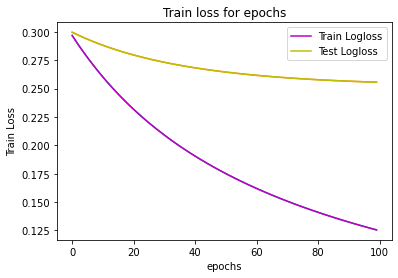

In [80]:
x1 = np.array([i for i in range(0,100) ])
y1 = np.array(train_loss)

x2 = np.array([i for i in range(0,100)])
y2 = np.array(test_loss)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.xlabel('epochs')
plt.ylabel('Train Loss')
plt.plot(x1, y1, "-m", label="Train Logloss")
plt.plot(x2, y2, "-y", label="Test Logloss")
plt.legend(loc="upper right")
plt.title('Train loss for epochs')
plt.show()

In [22]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=4)

In [23]:
rfecv=feature_selection(decision_tree,X_train_ss,y_train)

Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Fitting estimator with 100 features.
Fitting estimator with 90 features.
Optimal Feature 80
Feature_names ['x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13' 'x14' 'x15' 'x16' 'x17' 'x18'
 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30'
 'x31'

In [24]:
top_80_feat=list(np.where(rfecv)[0])[:80]

df_train_reduced=df_train_ss[df_train_ss.columns[top_80_feat]]
df_test_reduced=df_test_ss[df_train_ss.columns[top_80_feat]]
df_test_reduced_original=df_test_final[df_train_ss.columns[top_80_feat]]

print((df_train_reduced.shape),df_test_reduced.shape,df_test_reduced_original.shape)

(175, 80) (75, 80) (19750, 80)


## hinge

In [25]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
best alpha/parameter {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


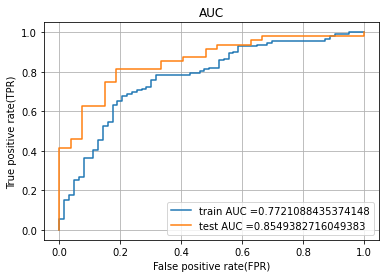

In [26]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
#                        class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model001=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt1_hinge=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [27]:
test_id = data_test['id']
sgd_h_dt2_hinge = model001.predict_proba(df_test_reduced_original)[:,1]
sgd_h_dt2_hinge_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt2_hinge)), columns=['id','target'])
sgd_h_dt2_hinge_1['id'] = sgd_h_dt2_hinge_1['id'].astype('int32')
sgd_h_dt2_hinge_1.to_csv('submission_sgd_h_dt2_hinge_standard_1_50.csv', index=False)

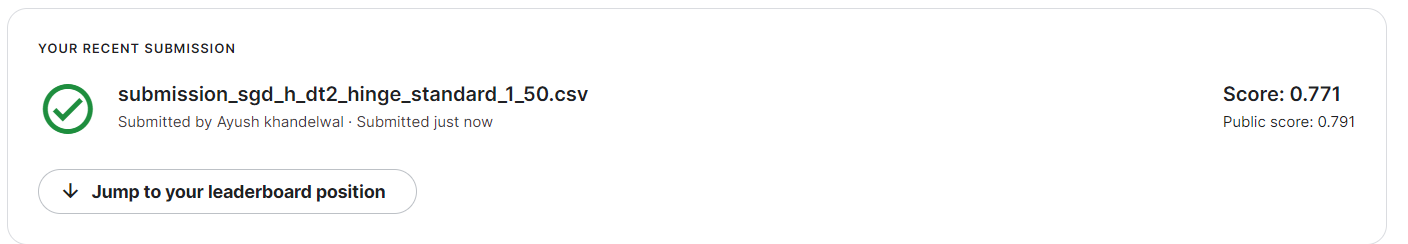

## logloss

In [28]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


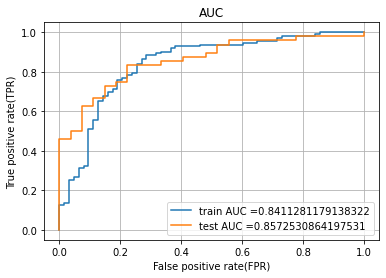

In [29]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model002=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt1_log=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [30]:
test_id = data_test['id']
sgd_h_dt2_log = model002.predict_proba(df_test_reduced_original)[:,1]
sgd_h_dt2_log_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt2_log)), columns=['id','target'])
sgd_h_dt2_log_1['id'] = sgd_h_dt2_log_1['id'].astype('int32')
sgd_h_dt2_log_1.to_csv('submission_sgd_h_dt2_log_standard_50.csv', index=False)

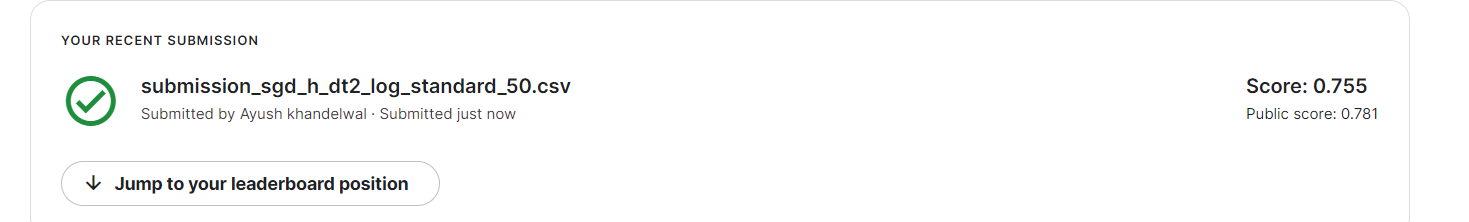

## huber

In [31]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


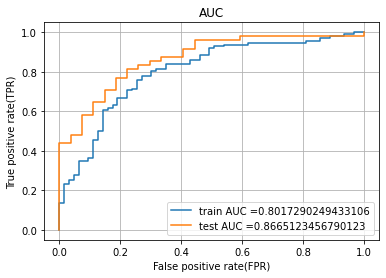

In [32]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model003=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt1_huber=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [33]:
test_id = data_test['id']
sgd_h_dt2_huber = model003.predict_proba(df_test_reduced_original)[:,1]
sgd_h_dt2_huber_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt2_huber)), columns=['id','target'])
sgd_h_dt2_huber_1['id'] = sgd_h_dt2_hinge_1['id'].astype('int32')
sgd_h_dt2_huber_1.to_csv('submission_sgd_h_dt2_huber_standard.csv', index=False)

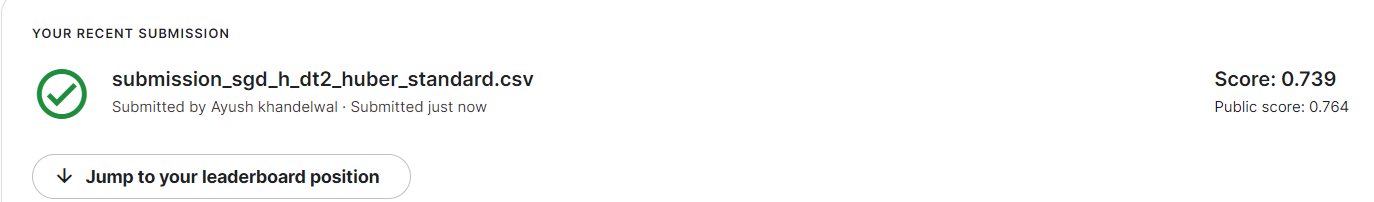

In [34]:
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100],
       'penalty':['l1','l2','elasticnet'],
       'solver':['liblinear','saga'],
      }
classifier=parameters_models(logistic_regression,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)


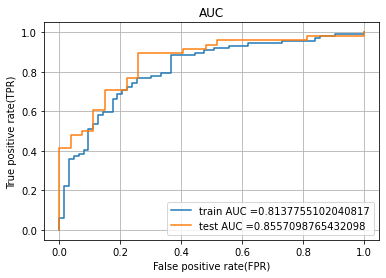

In [35]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'],
                   solver=classifier.best_params_['solver'],
                penalty=classifier.best_params_['penalty'],
#                 class_weight=classifier.best_params_['class_weight']
                                )
y_train_pred,y_test_pred,model004=modelling(log_reg_model,df_train_reduced,y_train,df_test_reduced)

lg_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [36]:
test_id = data_test['id']
lg_h_dt1_final = model004.predict_proba(df_test_reduced_original)[:,1]
log_reg_final = pd.DataFrame(np.column_stack((test_id,lg_h_dt1_final)), columns=['id','target'])
log_reg_final['id'] = log_reg_final['id'].astype('int32')
log_reg_final.to_csv('submission_log_reg_final_standardization_1_50_1.csv', index=False)

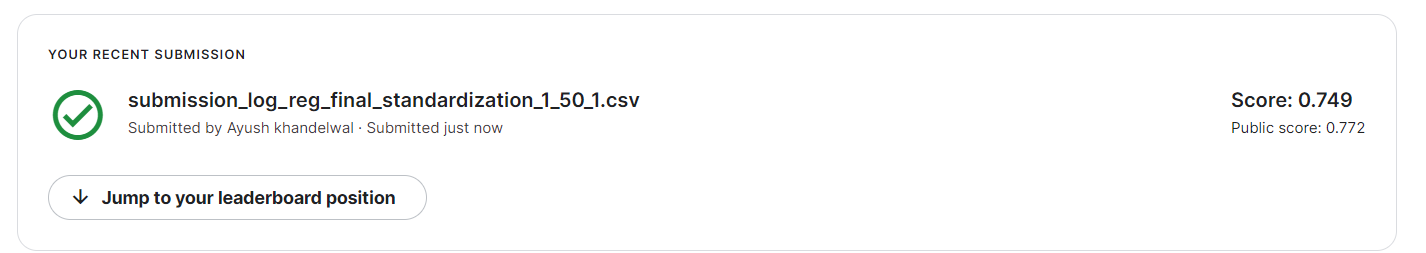

## Models with full data without train test split

## Logistic Regression

In [37]:
# https://www.kaggle.com/code/tboyle10/hyperparameter-tuning/notebook
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100],
       'penalty':['l1','elasticnet'],
       'solver':['liblinear','saga'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }

grid = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(x_train,y_train_1)
print(grid.best_params_)

log_reg_model=LogisticRegression(C=grid.best_params_['C'],
                   solver=grid.best_params_['solver'],
                penalty=grid.best_params_['penalty'],
                class_weight=grid.best_params_['class_weight'])
                                
predictions = log_reg_model.fit(x_train, y_train_1).predict_proba(x_test)
pred=(predictions[:,1])

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


In [38]:
submit1=pd.read_csv("sample_submission.csv")
submit1['target']=pred

x2=submit1.to_csv("log_reg_full_stand2_3.csv",index=False)

# pd.read_csv("log_reg_full_stand2.csv")

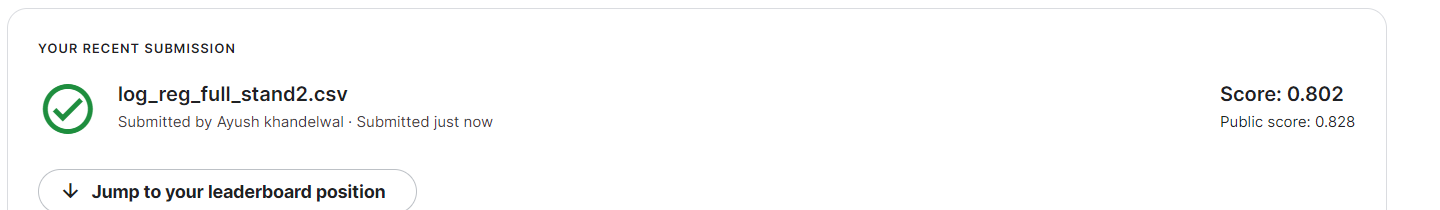

## SGD with hinge loss

In [39]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


classifier=parameters_models(sgd,param,x_train,y_train_1)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])

sgd_model.fit(x_train,y_train_1)

y_test_pred,model001=calibrated_full(sgd_model,x_train,y_train_1,x_test)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [40]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=y_test_pred

x5=submit5.to_csv("sgd_hinge_full_stand2.csv",index=False)

pd.read_csv("sgd_hinge_full_stand2.csv")

,id,target
0,250,0.831663
1,251,0.912875
2,252,0.358736
3,253,0.988197
4,254,0.459112
...,...,...
19745,19995,0.558535
19746,19996,0.999377
19747,19997,0.549553
19748,19998,0.998214


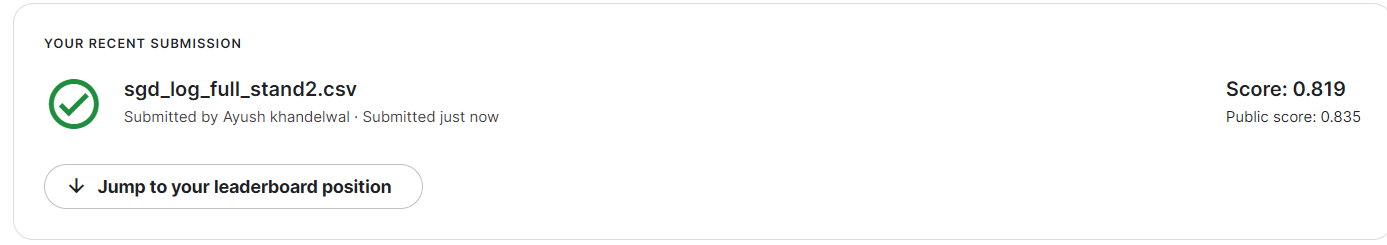

## SGD with logloss


In [41]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


classifier=parameters_models(sgd,param,x_train,y_train_1)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])

sgd_model.fit(x_train,y_train_1)

y_test_pred,model002=calibrated_full(sgd_model,x_train,y_train_1,x_test)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [42]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=y_test_pred

x5=submit5.to_csv("sgd_log_full_stand2.csv",index=False)

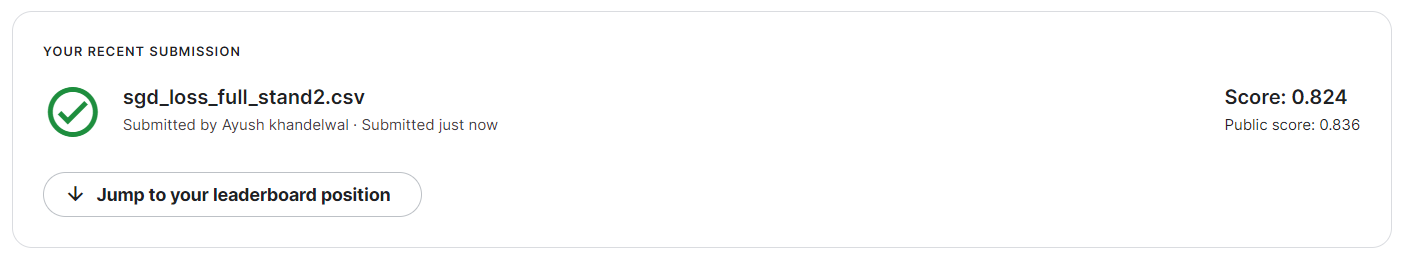

## SGD with huber loss

In [43]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


classifier=parameters_models(sgd,param,x_train,y_train_1)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])

sgd_model.fit(x_train,y_train_1)

y_test_pred,model003=calibrated_full(sgd_model,x_train,y_train_1,x_test)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [44]:
submit4=pd.read_csv("sample_submission.csv")
submit4['target']=y_test_pred

x4=submit4.to_csv("sgd_huber_full_stand2.csv",index=False)


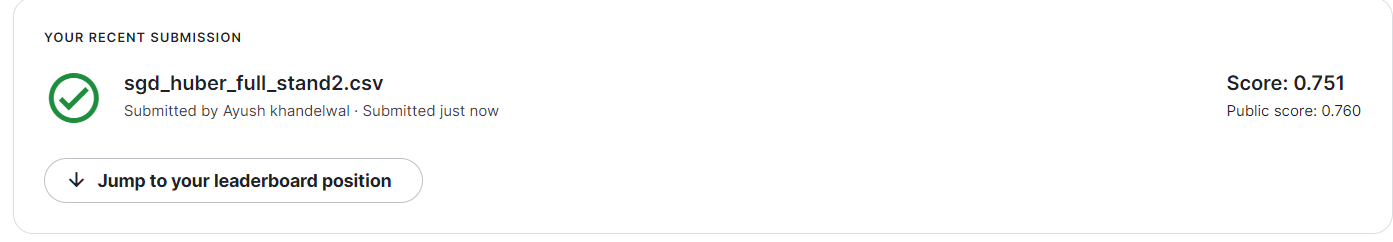

## Simple models starts:

## Logistic Regression

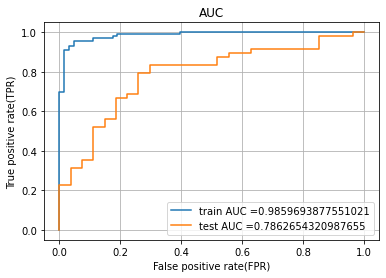

In [45]:
log_reg_model=LogisticRegression()
y_train_pred,y_test_pred,model1=modelling(log_reg_model,df_train_reduced,y_train,df_test_reduced)

lg_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## SVClassifier

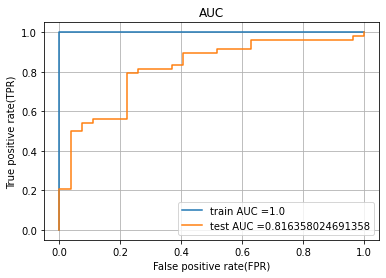

In [46]:
svc_model=SVC(probability=True)
y_train_pred,y_test_pred,model2=modelling(svc_model,df_train_reduced,y_train,df_test_reduced)

svc_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)


## Decision Tree

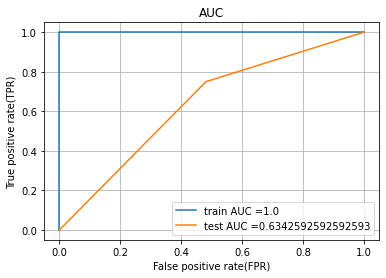

In [47]:
decision_tree=DecisionTreeClassifier()
y_train_pred,y_test_pred,model3=modelling(decision_tree,df_train_reduced,y_train,df_test_reduced)

dt_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Random Forest

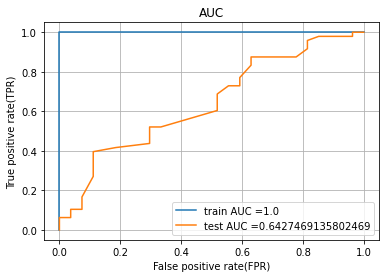

In [48]:
random_forest_model=RandomForestClassifier()
y_train_pred,y_test_pred,model4=modelling(random_forest_model,df_train_reduced,y_train,df_test_reduced)

rf_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## XGBoost

[13:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


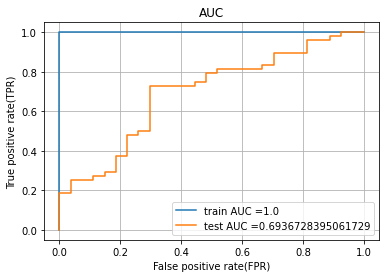

In [49]:
xgb_model=XGBClassifier()
y_train_pred,y_test_pred,model5=modelling(xgb_model,df_train_reduced,y_train,df_test_reduced)

xgb_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Logistic Regression Using hyperparameter

In [50]:
logistic_regression=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(logistic_regression,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [51]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model7=modelling(log_reg_model,df_train_reduced,y_train,df_test_reduced)


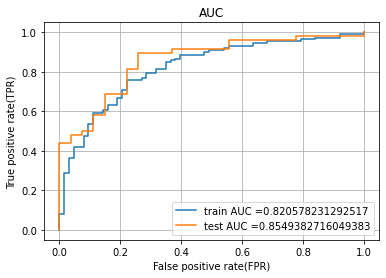

In [52]:
lg_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [53]:
test_id = data_test['id']
lg_h_dt1_final = model7.predict_proba(df_test_reduced_original)[:,1]
log_reg_final = pd.DataFrame(np.column_stack((test_id,lg_h_dt1_final)), columns=['id','target'])
log_reg_final['id'] = log_reg_final['id'].astype('int32')
log_reg_final.to_csv('submission_log_reg_final_standardization_1_50_1.csv', index=False)

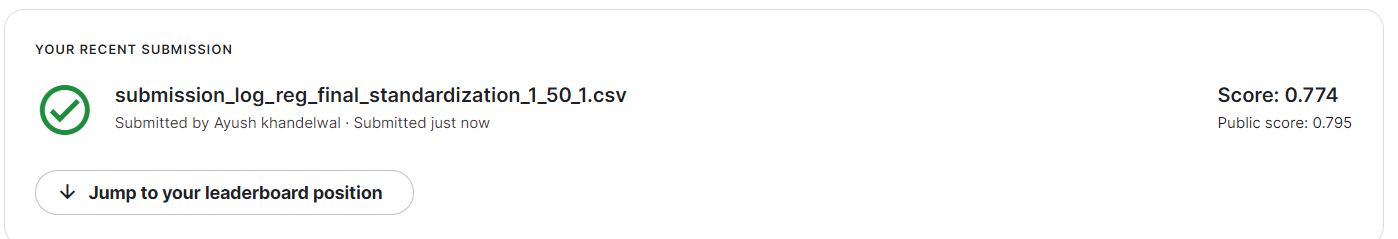

## SVClassifier using Hyperparmaeter

In [54]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01],
        'C': [3,4,5,6],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_reduced,y_train)
print(classifier)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
best alpha/parameter {'C': 3, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [3, 4, 5, 6], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [55]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model8=modelling(svc_model,df_train_reduced,y_train,df_test_reduced)

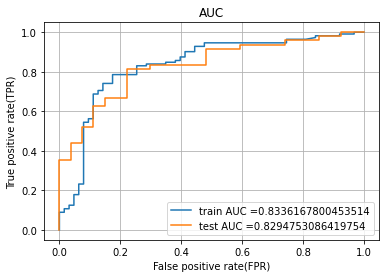

In [56]:
svc_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Decision Tree using Hyperparameter

In [57]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_reduced,y_train)
print(classifier)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [58]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model9=modelling(decision_tree_model,df_train_reduced,y_train,df_test_reduced)

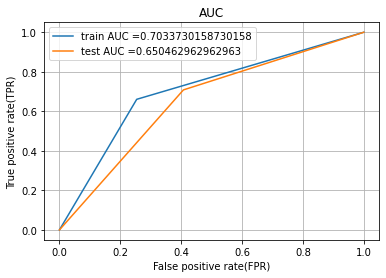

In [59]:
dt_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Random Forest using Hyperparameter 

In [60]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[4,5,6,7],'max_features':['sqrt', 'log2',None],'max_samples':[0.7]}
classifier=parameters_models(random_forest,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
best alpha/parameter {'max_depth': 10, 'max_features': None, 'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 6}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [61]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'],max_samples=classifier.best_params_['max_samples'])
y_train_pred,y_test_pred,model10=modelling(random_forest_model,df_train_reduced,y_train,df_test_reduced)

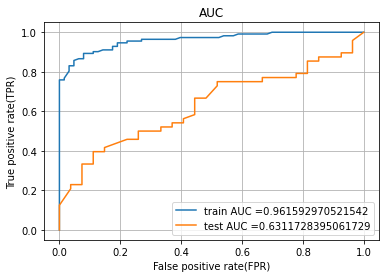

In [62]:
rf_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## XGBoost using Hyperparameter 

In [63]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_reduced,y_train)
print(classifier)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

In [64]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
y_train_pred,y_test_pred,model11=modelling(xgb_model,df_train_reduced,y_train,df_test_reduced)

[13:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


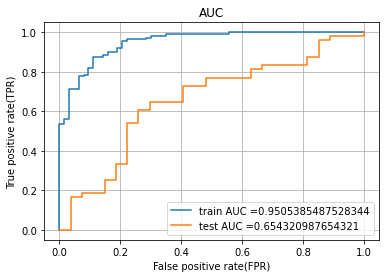

In [65]:
xgb_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## DATASET 2-Dataset with only engineered features along with Standardization.

## Feature Enginnering

This transformation is explained in EDA video and classroom classes by appliedaicourse under logistic regression module. https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3025/non-linearly-separable-data-feature-engineering/3/module-3-foundations-of-natural-language-processing-and-machine-learning

I have done feature enginnering with X_train and X_test and normalize it.


Feature enginnering on train dataset

In [66]:
df_train_feature_eng=pd.DataFrame()
df_train_feature_eng=feature_enginnering(X_train,df_train_feature_eng)
df_train_feature_eng.shape

(175, 48)

Feature enginnering on test Dataset

In [67]:
df_test_feature_eng=pd.DataFrame()
df_test_feature_eng=feature_enginnering(X_test,df_test_feature_eng)
df_test_feature_eng.shape

(75, 48)

Feature enginnering on original test Dataset

In [68]:
df_test_feature_eng_original=pd.DataFrame()
df_test_feature_eng_original=feature_enginnering(data_test_1,df_test_feature_eng_original)
df_test_feature_eng_original.shape

(19750, 48)

standard scaler

In [69]:
df_train_feat,df_test_feat,df_train_feature_eng_ss,df_test_feature_eng_ss,df_test_final_feature_eng_ss=standard_scaler(df_train_feature_eng,df_test_feature_eng,df_test_feature_eng_original)

print((df_train_feature_eng_ss.shape),df_test_feature_eng_ss.shape,df_test_final_feature_eng_ss.shape)

(175, 48) (75, 48) (19750, 48)


Modelling is done only on the enginnered feature

Logistic Regression

Fitting 3 folds for each of 24 candidates, totalling 72 fits
best alpha/parameter {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)


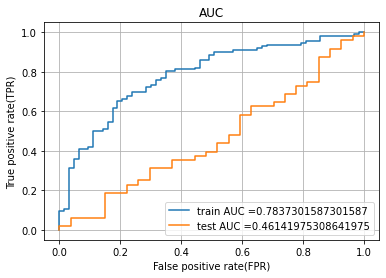

In [70]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','saga']}
classifier=parameters_models(log_reg,param,df_train_feature_eng_ss,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model12=modelling(log_reg_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

lg_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
best alpha/parameter {'C': 2, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


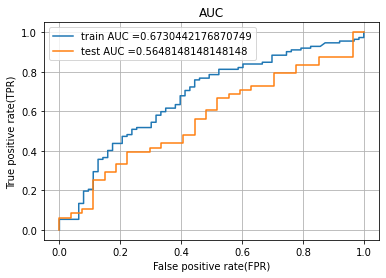

In [71]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_feature_eng_ss,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model14=modelling(svc_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

svc_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Decision Tree

Fitting 3 folds for each of 160 candidates, totalling 480 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


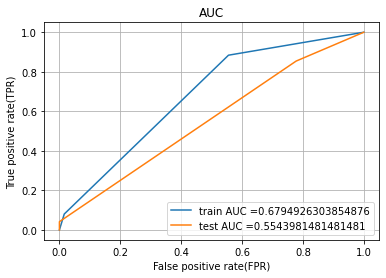

In [72]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_feature_eng_ss,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model15=modelling(decision_tree_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)


dt_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)


Random Forest

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
best alpha/parameter {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 6}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


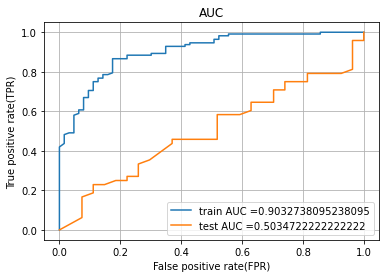

In [73]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None],'max_samples':[0.7]}
classifier=parameters_models(random_forest,param,df_train_feature_eng_ss,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'],max_samples=classifier.best_params_['max_samples'])
y_train_pred,y_test_pred,model16=modelling(random_forest_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

rf_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

XGboost

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'subsample': 0.3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

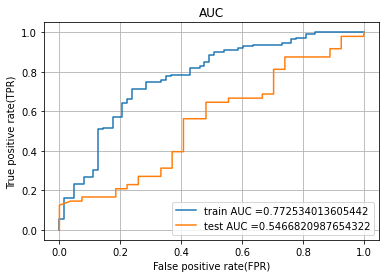

In [74]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_feature_eng_ss,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model17=modelling(xgb_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

xgb_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

##  Dataset 3 - Dataset with transformed features on the reduced dimensionality along with standardization.

BoxCox Transformation

In [75]:
box_cox_train_ss,box_cox_test_ss,box_cox_original_test_ss=box_cox_transformation(df_train_reduced,df_test_reduced,df_test_reduced_original)

print((box_cox_train_ss.shape),box_cox_test_ss.shape,box_cox_original_test_ss.shape)

(175, 80) (75, 80) (19750, 80)


## Box Cox transformation without train test split

In [76]:
original_boxcox_train,original_boxcox_test=box_cox_transformation1(x_train,x_test)

## SGDlogloss

In [77]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


classifier=parameters_models(sgd,param,original_boxcox_train,y_train_1)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])

sgd_model.fit(original_boxcox_train,y_train_1)

y_test_pred,model101=calibrated_full(sgd_model,original_boxcox_train,y_train_1,original_boxcox_test)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [78]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_log_fulldt3_stand_41.csv",index=False)



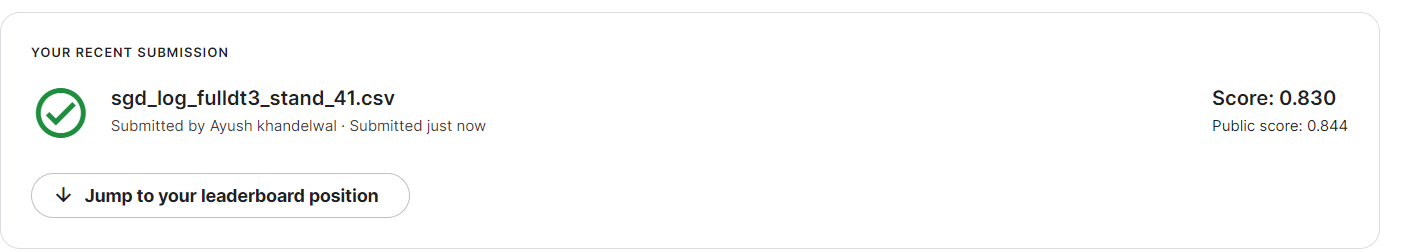

## SGD with huber loss

In [79]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


classifier=parameters_models(sgd,param,original_boxcox_train,y_train_1)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])

sgd_model.fit(original_boxcox_train,y_train_1)

y_test_pred,model101=calibrated_full(sgd_model,original_boxcox_train,y_train_1,original_boxcox_test)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [80]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_huber_fulldt3_robust.csv",index=False)

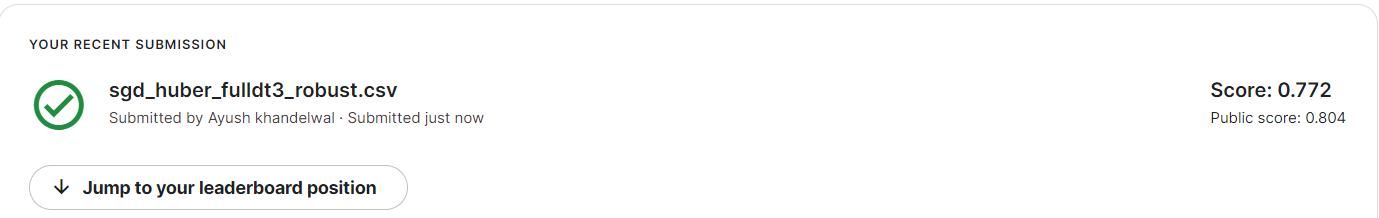

## Logistic regression

In [81]:
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100,1000],
       'penalty':['l1','l2','elasticnet'],
       'solver':['liblinear','saga'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }

grid = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(original_boxcox_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


In [82]:
log_reg_model=LogisticRegression(C=grid.best_params_['C'],
                   solver=grid.best_params_['solver'],
                penalty=grid.best_params_['penalty'],
                class_weight=grid.best_params_['class_weight'])

predictions = log_reg_model.fit(original_boxcox_train, y_train_1).predict_proba(original_boxcox_test)

pred=(predictions[:,1])

In [83]:
submit4=pd.read_csv("sample_submission.csv")
submit4['target']=pred

x4=submit4.to_csv("logistic_regressionst3_full_stand3.csv",index=False)

# pd.read_csv("logistic_regression_fulldt3_robust.csv")

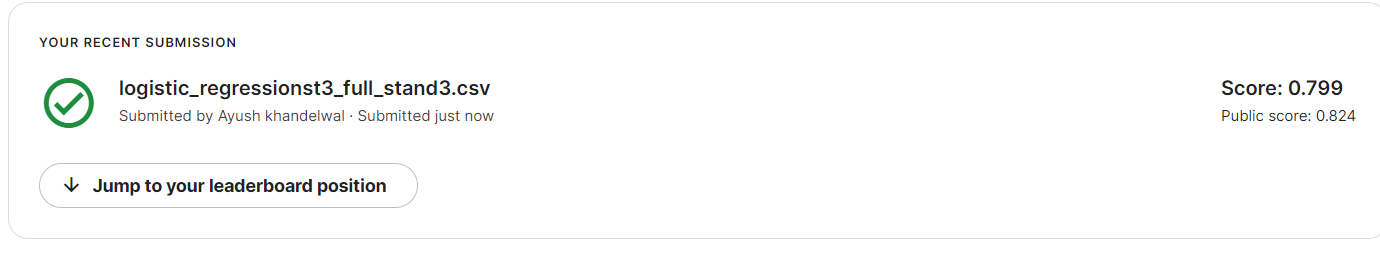

## reduced features models with boxcox transformation

SGD with Hinge loss

In [84]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


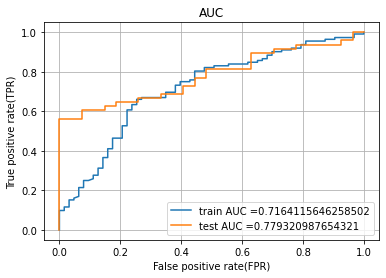

In [85]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_hinge=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)


SGD with logloss

In [86]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


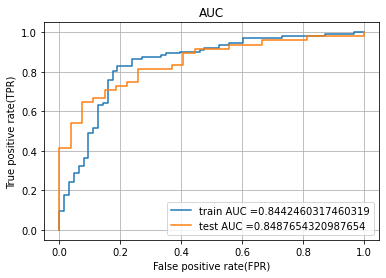

In [87]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model101=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_log=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [88]:
test_id = data_test['id']
sgd_h_dt3_log = model101.predict_proba(box_cox_original_test_ss)[:,1]
sgd_h_dt3_log_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt3_log)), columns=['id','target'])
sgd_h_dt3_log_1['id'] =sgd_h_dt3_log_1['id'].astype('int32')
sgd_h_dt3_log_1.to_csv('submission_sgd_h_dt3_log_standard.csv', index=False)

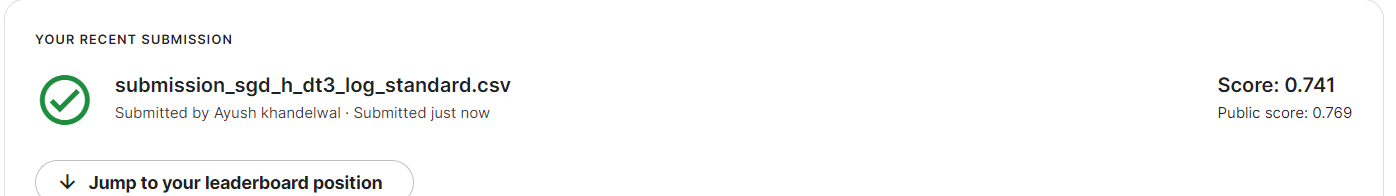

SGD with huber loss

In [89]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


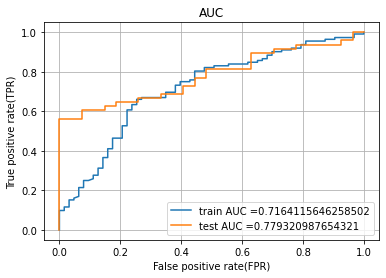

In [90]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model100=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_huber=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [91]:
test_id = data_test['id']
sgd_h_dt3_huber = model100.predict_proba(box_cox_original_test_ss)[:,1]
sgd_h_dt3_huber_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt3_huber)), columns=['id','target'])
sgd_h_dt3_huber_1['id'] =sgd_h_dt3_huber_1['id'].astype('int32')
sgd_h_dt3_huber_1.to_csv('submission_sgd_h_dt3_huber_huber_standard.csv', index=False)

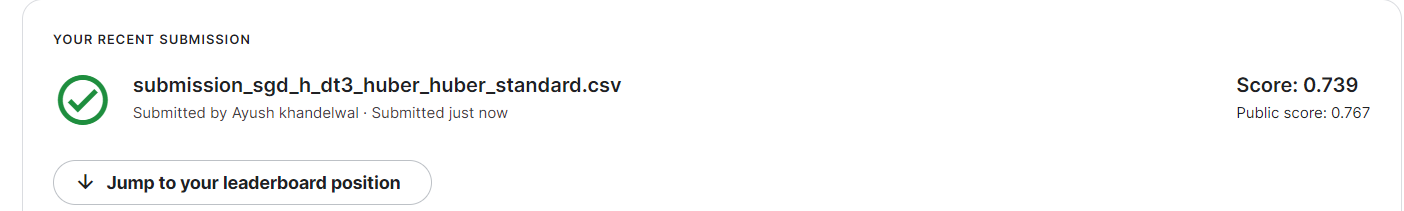

Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


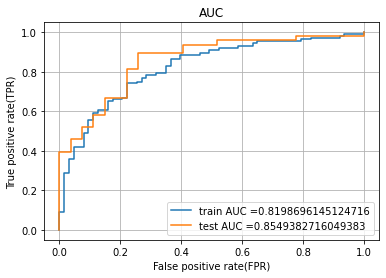

In [92]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,box_cox_train_ss,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model18=modelling(log_reg_model,box_cox_train_ss,y_train,box_cox_test_ss)

lg_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [94]:
test_id = data_test['id']
lg_bx_dt3 = model18.predict_proba(box_cox_original_test_ss)[:,1]
lg_bx_dt3_1 = pd.DataFrame(np.column_stack((test_id,lg_bx_dt3)), columns=['id','target'])
lg_bx_dt3_1['id'] = lg_bx_dt3_1['id'].astype('int32')
lg_bx_dt3_1.to_csv('submission_lg_bx_dt3_1_standardization_1_50_new.csv', index=False)

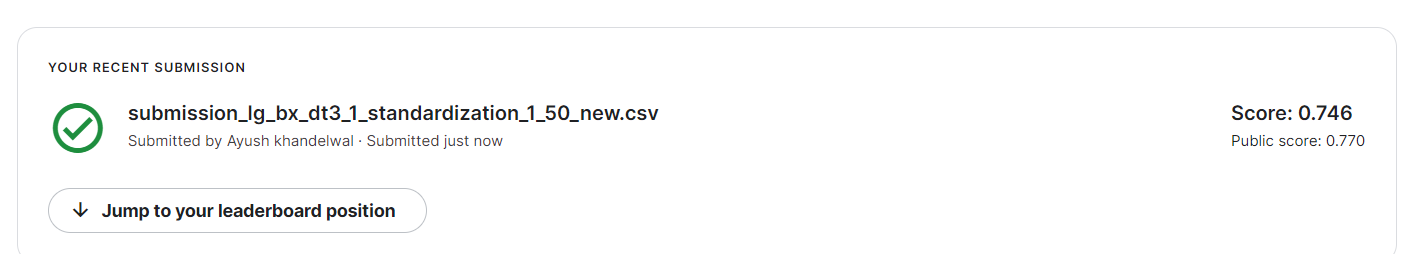

SVClassifier

Fitting 3 folds for each of 18 candidates, totalling 54 fits
best alpha/parameter {'C': 20, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [20, 30, 40], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


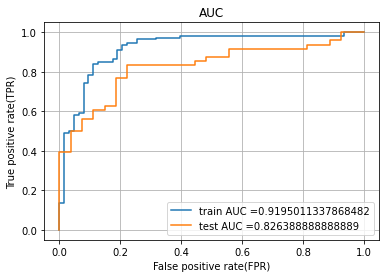

In [95]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01],
        'C': [20,30,40],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,box_cox_train_ss,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model20=modelling(svc_model,box_cox_train_ss,y_train,box_cox_test_ss)

svc_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Decision Tree

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 2, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


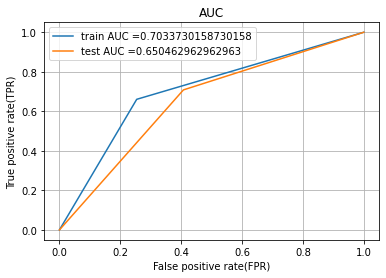

In [96]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8],
      'max_features':['auto', 'sqrt', 'log2',None]}
classifier=parameters_models(decision_tree,param,box_cox_train_ss,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model21=modelling(decision_tree_model,box_cox_train_ss,y_train,box_cox_test_ss)


dt_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
best alpha/parameter {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


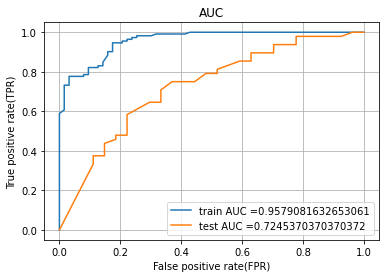

In [97]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,box_cox_train_ss,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])

y_train_pred,y_test_pred,model22=modelling(random_forest_model,box_cox_train_ss,y_train,box_cox_test_ss)

rf_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 20, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

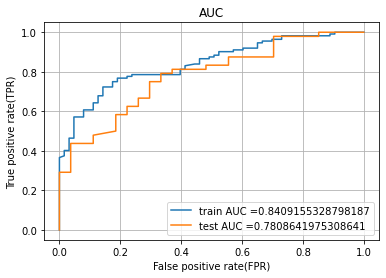

In [98]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,box_cox_train_ss,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model23=modelling(xgb_model,box_cox_train_ss,y_train,box_cox_test_ss)

xgb_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Dataset4 - PCA on the original features. Take those many principal components which would explain 95% of the variance in the data. Please print the variance explained by taking the number of principal components in a list and fitting the PCA.

In [99]:
variance_list=[]
for i in range(1,X_train.shape[0]):
    pca=PCA(n_components=i)
    pca.fit_transform(X_train_ss,y_train)
    variance_list.append(pca.explained_variance_ratio_)
    
print(variance_list)

[array([0.01735603]), array([0.01735603, 0.0166956 ]), array([0.01735603, 0.0166956 , 0.01656424]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 ]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 , 0.01498771]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 , 0.01498771, 0.0147271 ]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 , 0.01498771, 0.0147271 , 0.01451613]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 , 0.01498771, 0.0147271 , 0.01451613, 0.01430137]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01527522,
       0.0150683 , 0.01498771, 0.0147271 , 0.01451613, 0.01430137,
       0.01397558]), array([0.01735603, 0.0166956 , 0.01656424, 0.01556311, 0.01

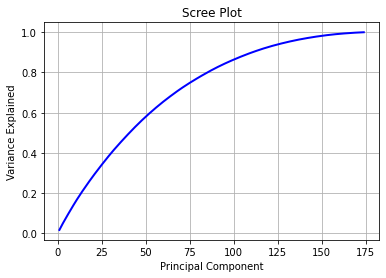

In [100]:
val=np.arange(pca.n_components)+1

plt.plot(val, np.cumsum(pca.explained_variance_ratio_),linewidth=2, color='blue')
plt.grid()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Taking the number of components =145 because it has preserved 99% variance

In [101]:
pca_fitted=PCA(n_components=145)
pca_fitted_train=pca_fitted.fit_transform(X_train_ss)
pca_fitted_test=pca_fitted.transform(X_test_ss)

Decision Tree

Fitting 3 folds for each of 128 candidates, totalling 384 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_split': 7}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


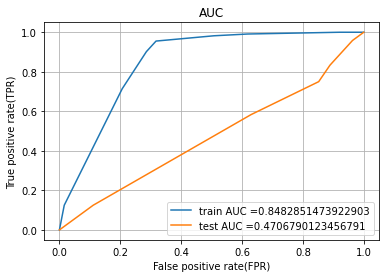

In [102]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,pca_fitted_train,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model24=modelling(decision_tree_model,pca_fitted_train,y_train,pca_fitted_test)


dt_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


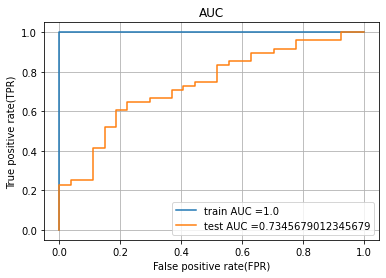

In [103]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,pca_fitted_train,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model26=modelling(log_reg_model,pca_fitted_train,y_train,pca_fitted_test)

lg_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SVClassifier

Fitting 3 folds for each of 32 candidates, totalling 96 fits
best alpha/parameter {'C': 4, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'linear', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [4, 5, 6, 7], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


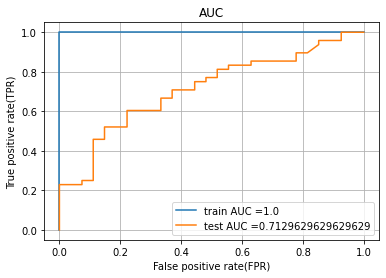

In [104]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [4,5,6,7],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,pca_fitted_train,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model27=modelling(svc_model,pca_fitted_train,y_train,pca_fitted_test)

svc_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
best alpha/parameter {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [2, 3, 4]},
             return_train_score=True, scoring='roc_auc', verbose=1)


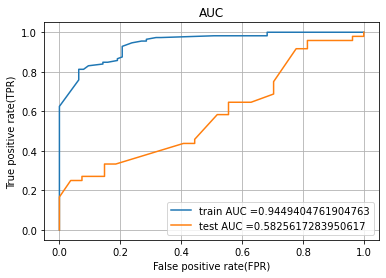

In [105]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4],'max_depth':[12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,pca_fitted_train,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])
y_train_pred,y_test_pred,model28=modelling(random_forest_model,pca_fitted_train,y_train,pca_fitted_test)

rf_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 7, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

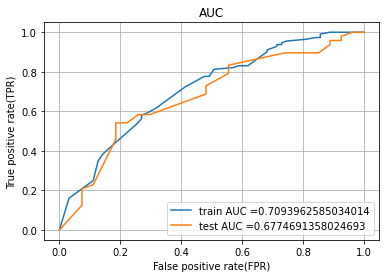

In [106]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,pca_fitted_train,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model29=modelling(xgb_model,pca_fitted_train,y_train,pca_fitted_test)

xgb_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

##  Dataset5 - Oversampling the data to make it balanced and also on top of that reduced feature set along with feature transformation and standardization

## Standardization With Oversampling

In [107]:
X_train_os,y_train_os=oversampled_ss(X_train,y_train)

X_train_os_ss,X_test_ss,df_train_os_ss,df_test_ss,df_test_final_os=standard_scaler(X_train_os,X_test,data_test_1)

print((df_train_os_ss.shape),df_test_ss.shape,df_test_final_os.shape)

(224, 300) (75, 300) (19750, 300)


## Decision Tree with Oversampling using RFECV¶

In [108]:
decision_tree=DecisionTreeClassifier()
rfecv=feature_selection(decision_tree,X_train_os_ss,y_train_os)

Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Fitting estimator with 100 features.
Fitting estimator with 90 features.
Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Optimal Feature 50
Feature_names ['x11' 'x12' 'x13' 'x14' 'x15' 'x16' 'x17' 'x1

In [112]:
top_60_feat=list(np.where(rfecv)[0])[:60]

df_train_reduced_os=df_train_os_ss[df_train_os_ss.columns[top_60_feat]]
df_test_reduced_os=df_test_ss[df_train_os_ss.columns[top_60_feat]]
df_test_original_reduced_os=df_test_final_os[df_train_os_ss.columns[top_60_feat]]
print((df_train_reduced_os.shape),df_test_reduced_os.shape,df_test_original_reduced_os.shape)

(224, 50) (75, 50) (19750, 50)


## Logistic Regression

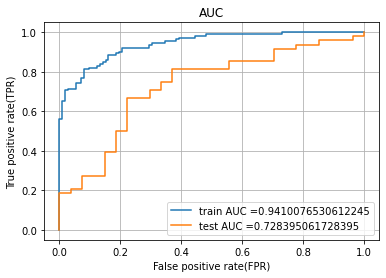

In [113]:
log_reg_model=LogisticRegression()
y_train_pred,y_test_pred,model30=modelling(log_reg_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

lg_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

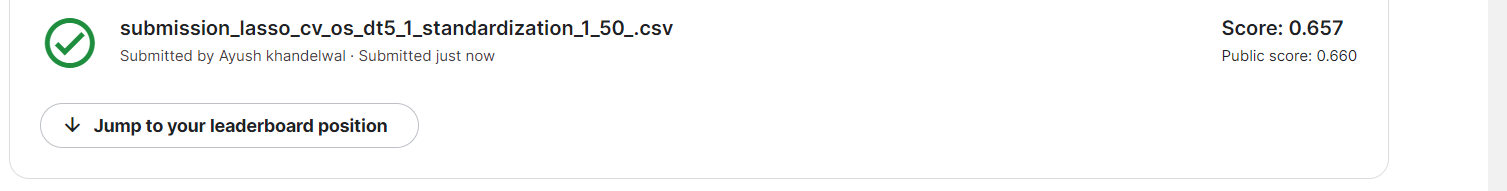

## SVClassifier

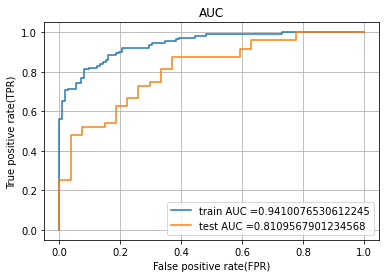

In [114]:
svc=SVC(probability=True)
yy_train_pred,y_test_pred,model32=modelling(svc,df_train_reduced_os,y_train_os,df_test_reduced_os)

svc_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

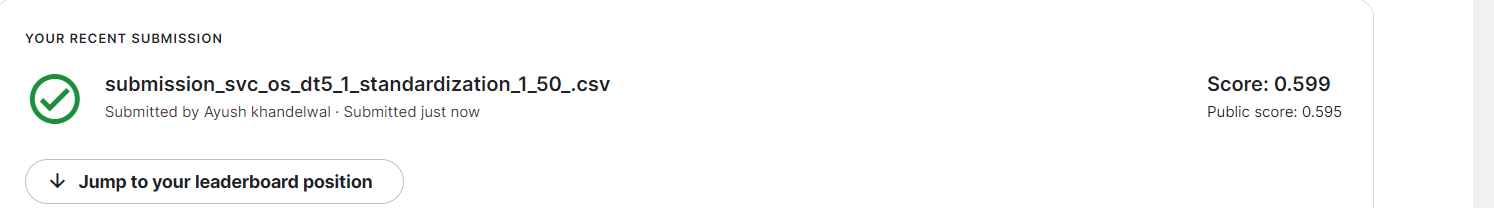

## Decision Tree

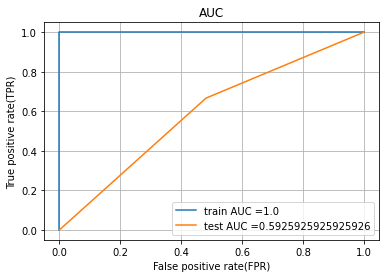

In [115]:
decision_tree=DecisionTreeClassifier()
y_train_pred,y_test_pred,model33=modelling(decision_tree,df_train_reduced_os,y_train_os,df_test_reduced_os)

dt_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

 ## Random Forest

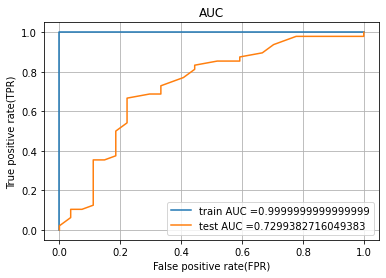

In [116]:
random_forest_model=RandomForestClassifier()
y_train_pred,y_test_pred,model34=modelling(random_forest_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

rf_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

 ## Xgboost

[13:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


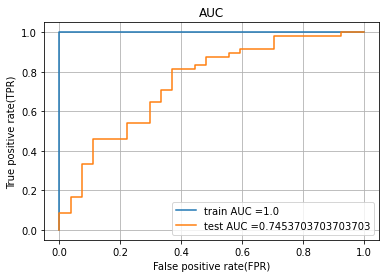

In [117]:
xgb_model=XGBClassifier()
y_train_pred,y_test_pred,model35=modelling(xgb_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

xgb_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)




## Logistic Regression using Hyperparameter with Oversampling

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


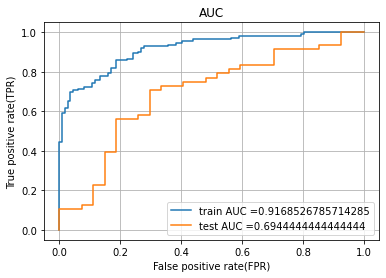

In [118]:
logistic_regression=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(logistic_regression,param,df_train_reduced_os,y_train_os)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model36=modelling(log_reg_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

lg_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [119]:
test_id = data_test['id']
lg_os_h_dt5 = model36.predict_proba(df_test_original_reduced_os)[:,1]
lg_os_h_dt5_1 = pd.DataFrame(np.column_stack((test_id,lg_os_h_dt5)), columns=['id','target'])
lg_os_h_dt5_1['id'] = lg_os_h_dt5_1['id'].astype('int32')
lg_os_h_dt5_1.to_csv('submission_lg_os_h_dt5_1_standardization_1_50_.csv', index=False)

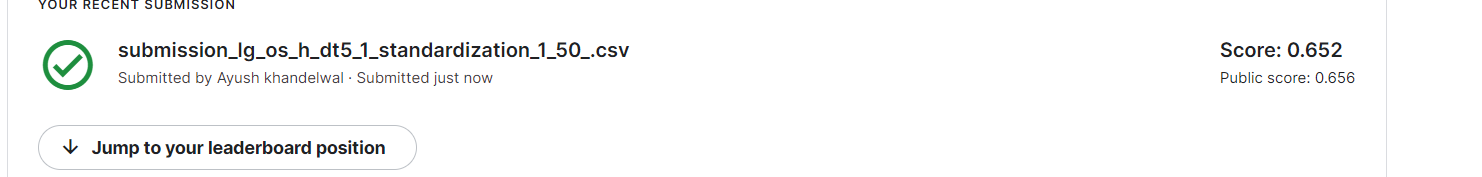

## SGD with Hingeloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


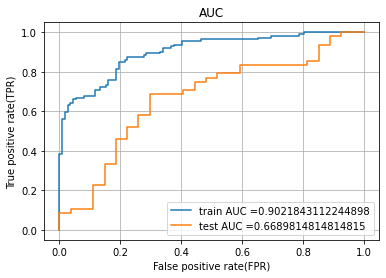

In [120]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_hinge=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SGD with logloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


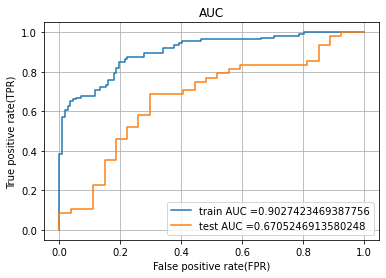

In [121]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)



sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model001=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_log=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SGD with huber loss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


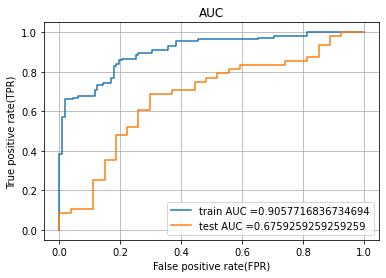

In [122]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model001=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_huber=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SVClassifier using Hyperparameter with Oversampling

Fitting 3 folds for each of 30 candidates, totalling 90 fits
best alpha/parameter {'C': 3, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


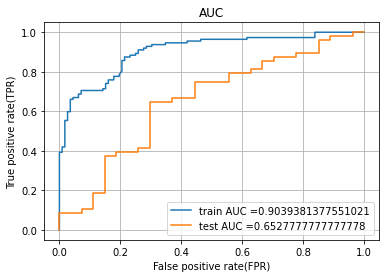

In [123]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_reduced_os,y_train_os)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model37=modelling(svc_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

svc_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Decision Tree using Hyperparameter with Oversampling

Fitting 3 folds for each of 160 candidates, totalling 480 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_split': 9}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


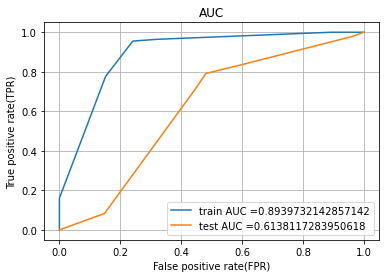

In [124]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,11,12,13,14],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_reduced_os,y_train_os)
print(classifier)


decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model38=modelling(decision_tree_model,df_train_reduced_os,y_train_os,df_test_reduced_os)


dt_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Random Forest using Hyperparameter with Oversampling

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
best alpha/parameter {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


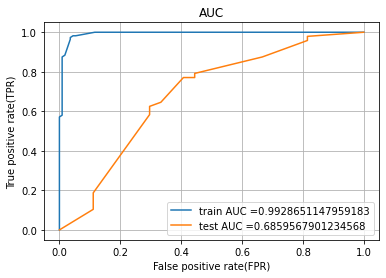

In [125]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[3,4,5],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,df_train_reduced_os,y_train_os)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )
y_train_pred,y_test_pred,model39=modelling(random_forest_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

rf_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Xgboost using Hyperparameter with Oversampling

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 15, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

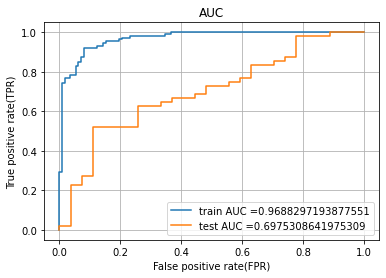

In [126]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_reduced_os,y_train_os)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
y_train_pred,y_test_pred,model40=modelling(xgb_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

xgb_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Feature Enginnering With Oversampling

I have done feature enginnering with oversampled dataset and standardize it.

I have merged 2 dataframe the enginnered standardize feature and reduced standardize feature which i got from to do modelling.

My reduced feature are already standardize when i have done logistic regression modelling to get reduced features

In [127]:
df_train_feature_eng_os=pd.DataFrame()
df_train_feature_eng_os=feature_enginnering(X_train_os,df_train_feature_eng_os)
df_train_feature_eng_os.shape

(224, 48)

In [128]:
df_test_feature_eng_os=pd.DataFrame()
df_test_feature_eng_os=feature_enginnering(X_test,df_test_feature_eng_os)
df_test_feature_eng_os.shape

(75, 48)

In [129]:
df_test_feature_original_eng_os=pd.DataFrame()
df_test_feature_original_eng_os=feature_enginnering(df_test_final_os,df_test_feature_original_eng_os)
df_test_feature_original_eng_os.shape

(19750, 48)

In [130]:
train_eng_os,test_eng_os,df_train_eng_os_ss,df_test_eng_os_ss,df_test_original_os_ss=standard_scaler(df_train_feature_eng_os,df_test_feature_eng_os,df_test_feature_original_eng_os)

## Merging of Features

In [131]:
frames1=[df_train_eng_os_ss,df_train_reduced_os]
final_dataframe_train_os=pd.concat(frames1,axis=1)

In [132]:
frames=[df_test_eng_os_ss,df_test_reduced_os]
final_dataframe_test_os=pd.concat(frames,axis=1)

In [133]:
frames3=[df_test_original_os_ss,df_test_original_reduced_os]
final_dataframe_original_test_os=pd.concat(frames3,axis=1)



## Feature Transformation

BoxCox Transformation

In [134]:
final_dataframe_train_box_cox_os,final_dataframe_test_box_cox_os,final_dataframe_original_test_box_cox_os=box_cox_transformation(final_dataframe_train_os,final_dataframe_test_os,final_dataframe_original_test_os)

Logistic Regression

In [135]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [136]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model41=modelling(log_reg_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

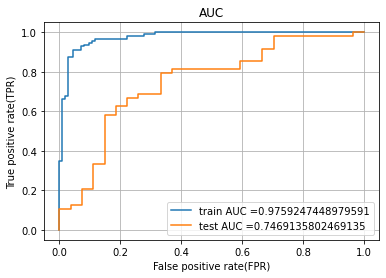

In [137]:
lg_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SGD with hinge loss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


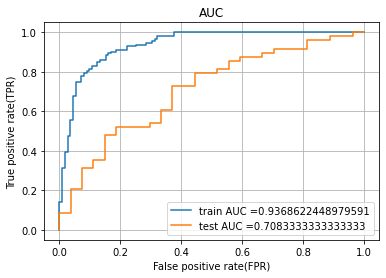

In [138]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_hinge=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SGD with logloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


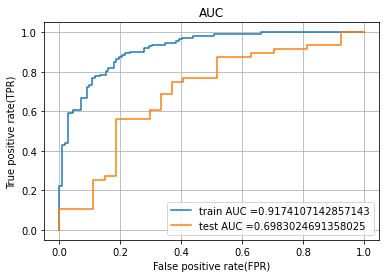

In [139]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_log=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)


SGD with huber loss

Fitting 3 folds for each of 60 candidates, totalling 180 fits
best alpha/parameter {'alpha': 1, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


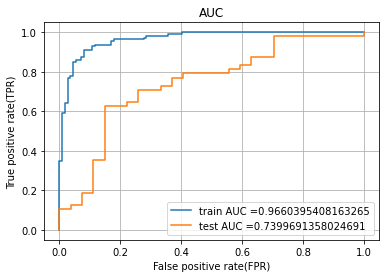

In [140]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
#        'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
#                        class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_huber=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SVClassifier

In [141]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
best alpha/parameter {'C': 2, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [142]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model43=modelling(svc_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

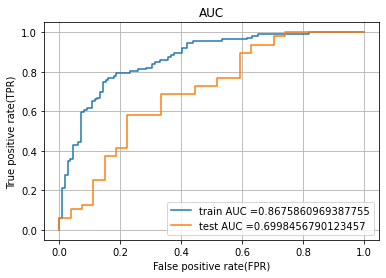

In [143]:
svc_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Decision Tree

In [144]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[11,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)


Fitting 3 folds for each of 160 candidates, totalling 480 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 5, 'min_samples_split': 7}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [145]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model44=modelling(decision_tree_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

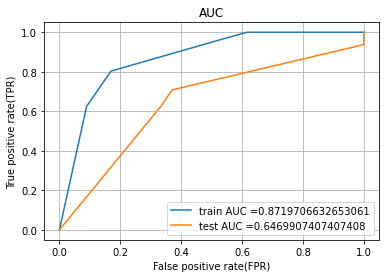

In [146]:
dt_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Random Forest

In [147]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4,5],'max_depth':[4,5,6,7],'min_samples_leaf':[1,2,3],
        'min_samples_split':[3,4,5],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
best alpha/parameter {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [148]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )

y_train_pred,y_test_pred,model45=modelling(random_forest_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

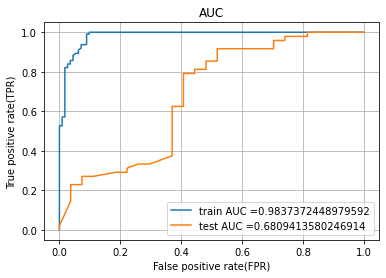

In [149]:
rf_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Xgboost

In [150]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

In [151]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model46=modelling(xgb_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

[13:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


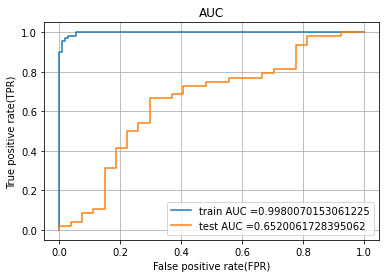

In [152]:
xgb_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Dataset6 -  PCA also on the reduced featureset.

In [154]:
variance_list=[]
for i in range(1,df_train_reduced.shape[1]):
    pca=PCA(n_components=i)
    pca.fit_transform(df_train_reduced,y_train)
    variance_list.append(pca.explained_variance_ratio_)
    
print(variance_list)

[array([0.03321683]), array([0.03321683, 0.03144758]), array([0.03321683, 0.03144758, 0.03036624]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959, 0.0264339 ]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959, 0.0264339 , 0.02576283]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959, 0.0264339 , 0.02576283, 0.02453115]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959, 0.0264339 , 0.02576283, 0.02453115, 0.02402906]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02887758,
       0.02706959, 0.0264339 , 0.02576283, 0.02453115, 0.02402906,
       0.02298234]), array([0.03321683, 0.03144758, 0.03036624, 0.02998809, 0.02

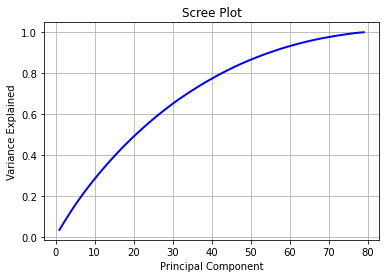

In [155]:
val=np.arange(pca.n_components)+1

plt.plot(val, np.cumsum(pca.explained_variance_ratio_),linewidth=2, color='blue')
plt.grid()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [166]:
pca_fitted=PCA(n_components=65)
pca_fitted_train=pca_fitted.fit_transform(df_train_reduced)
pca_fitted_test=pca_fitted.transform(df_test_reduced)

Logistic Regression

In [167]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,pca_fitted_train,y_train)
print(classifier)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [168]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model47=modelling(log_reg_model,pca_fitted_train,y_train,pca_fitted_test)

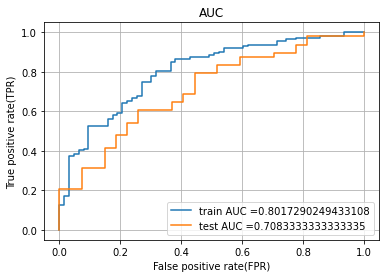

In [169]:
lg_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SVClassifier

In [170]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [30,40,50,60],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,pca_fitted_train,y_train)
print(classifier)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
best alpha/parameter {'C': 30, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [30, 40, 50, 60], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [171]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])

y_train_pred,y_test_pred,model49=modelling(svc_model,pca_fitted_train,y_train,pca_fitted_test)

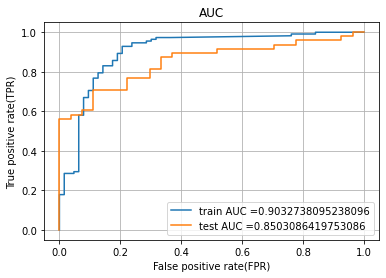

In [172]:
svc_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Decision Tree


In [173]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,pca_fitted_train,y_train)
print(classifier)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 8, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [174]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model50=modelling(decision_tree_model,pca_fitted_train,y_train,pca_fitted_test)


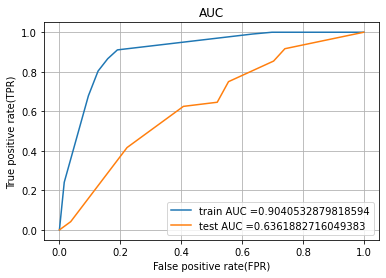

In [175]:
dt_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

In [176]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4,5],'max_depth':[12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,pca_fitted_train,y_train)
print(classifier)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
best alpha/parameter {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [177]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])
y_train_pred,y_test_pred,model51=modelling(random_forest_model,pca_fitted_train,y_train,pca_fitted_test)

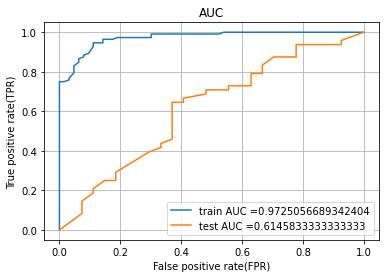

In [178]:
rf_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

In [179]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,pca_fitted_train,y_train)
print(classifier)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[14:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

In [180]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model52=modelling(xgb_model,pca_fitted_train,y_train,pca_fitted_test)

[14:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


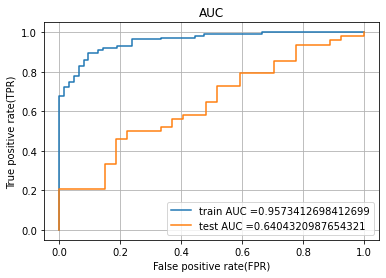

In [181]:
xgb_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Dataset 7 Dataset with transformed features on the reduced dimensionality along with standardization And OVERSAMPLING

BoxCox Transformation

In [182]:
box_cox_train_ss_os,box_cox_test_ss_os,box_cox_original_test_ss_os=box_cox_transformation(df_train_reduced_os,df_test_reduced_os,
                                                                df_test_original_reduced_os)
print((box_cox_train_ss_os.shape),box_cox_test_ss_os.shape,box_cox_original_test_ss_os.shape)

(224, 50) (75, 50) (19750, 50)


Logistic Regression

In [183]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best alpha/parameter {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [184]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model53=modelling(log_reg_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

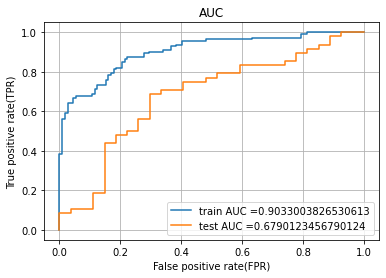

In [185]:
lg_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [186]:
test_id = data_test['id']
lg_bx_os_dt7 = model53.predict_proba(box_cox_original_test_ss_os)[:,1]
lg_bx_os_dt7_1 = pd.DataFrame(np.column_stack((test_id,lg_bx_os_dt7)), columns=['id','target'])
lg_bx_os_dt7_1['id'] = lg_bx_os_dt7_1['id'].astype('int32')
lg_bx_os_dt7_1.to_csv('submission_lg_bx_os_dt7_1_standardization_1_50_.csv', index=False)

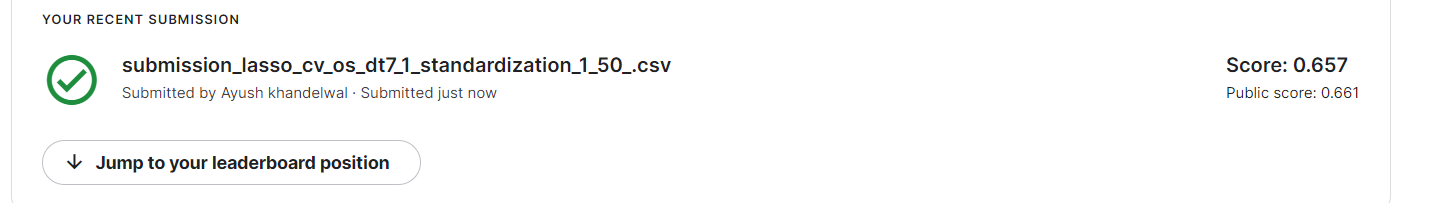

SGD with hingeloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


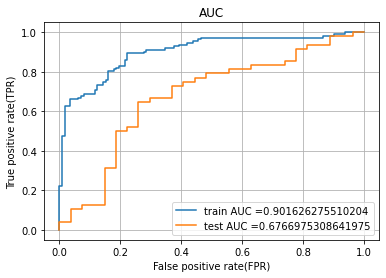

In [187]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

sgd_bx_os_dt7_hinge=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)


SGD with logloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


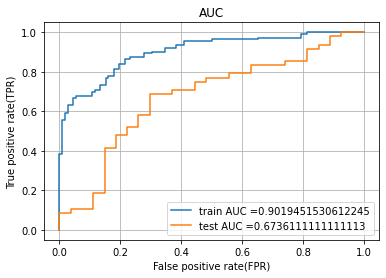

In [188]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

sgd_bx_os_dt7_log=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SGD with huberloss

Fitting 3 folds for each of 240 candidates, totalling 720 fits
best alpha/parameter {'alpha': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


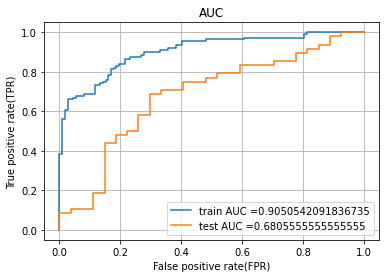

In [189]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

sgd_bx_os_dt7_huber=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SVClassifier

In [190]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1,],
        'C': [20,30,40,50],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,box_cox_train_ss_os,y_train_os)
print(classifier)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
best alpha/parameter {'C': 30, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [20, 30, 40, 50], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [191]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model55=modelling(svc_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

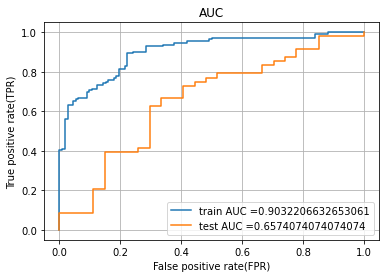

In [192]:
svc_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Decision Tree

In [193]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[11,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 8, 'min_samples_split': 7}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [194]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model56=modelling(decision_tree_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

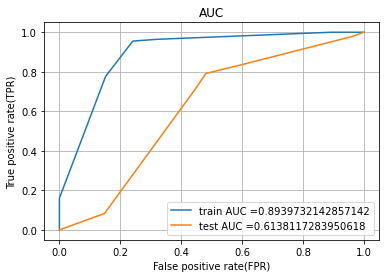

In [195]:
dt_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Random Forest

In [196]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4],'max_depth':[11,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
best alpha/parameter {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [197]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])

y_train_pred,y_test_pred,model57=modelling(random_forest_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

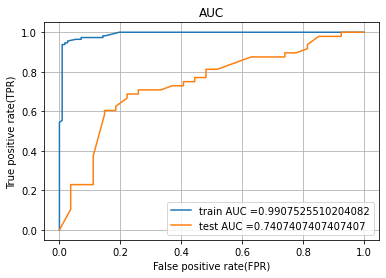

In [198]:
rf_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Xgboost

In [199]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[14:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 15, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

In [200]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model58=modelling(xgb_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

[14:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


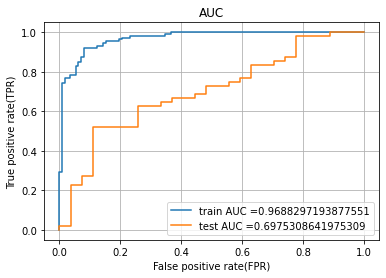

In [203]:
xgb_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [204]:
table=PrettyTable(['Dataset','clf','feat selection','Hyperpar Tuning','oversampling','transformation','PCA','train_auc','test_auc'])
table.add_row(['DATASET 1','Log_Reg','RFECV','no','no','no','no',np.round(lg_dt1[0],4),np.round(lg_dt1[1],4)])

table.add_row(['DATASET 1','SVC','RFECV','no','no','no','no',np.round(svc_dt1[0],4),np.round(svc_dt1[1],4)])
table.add_row(['DATASET 1','DT','RFECV','no','no','no','no',np.round(dt_dt1[0],4),np.round(dt_dt1[1],4)])
table.add_row(['DATASET 1','RF','RFECV','no','no','no','no',np.round(rf_dt1[0],4),np.round(rf_dt1[1],4)])
table.add_row(['DATASET 1','XGboost','RFECV','no','no','no','no',np.round(xgb_dt1[0],4),np.round(xgb_dt1[1],4)])



table.add_row(['DATASET 1','Log_Reg','RFECV','yes','no','no','no',np.round(lg_h_dt1[0],4),np.round(lg_h_dt1[1],4)])
table.add_row(['DATASET 1','SVC','RFECV','yes','no','no','no',np.round(svc_h_dt1[0],4),np.round(svc_h_dt1[1],4)])
table.add_row(['DATASET 1','DT','RFECV','yes','no','no','no',np.round(dt_h_dt1[0],4),np.round(dt_h_dt1[1],4)])
table.add_row(['DATASET 1','RF','RFECV','yes','no','no','no',np.round(rf_h_dt1[0],4),np.round(rf_h_dt1[1],4)])
table.add_row(['DATASET 1','XGboost','RFECV','yes','no','no','no',np.round(xgb_h_dt1[0],4),np.round(xgb_h_dt1[1],4)])
table.add_row(['DATASET 1','SGDlog','RFECV','no','no','no','no',np.round(sgd_h_dt1_log[0],4),np.round(sgd_h_dt1_log[1],4)])
table.add_row(['DATASET 1','SGDhinge','RFECV','no','no','no','no',np.round(sgd_h_dt1_hinge[0],4),np.round(sgd_h_dt1_hinge[1],4)])
table.add_row(['DATASET 1','SGDhuber','RFECV','no','no','no','no',np.round(sgd_h_dt1_huber[0],4),np.round(sgd_h_dt1_huber[1],4)])


table.add_row(['DATASET 2','Log_Reg','no','yes','no','no','no',np.round(lg_dt2[0],4),np.round(lg_dt2[1],4)])
table.add_row(['DATASET 2','SVC','no','yes','no','no','no',np.round(svc_dt2[0],4),np.round(svc_dt2[1],4)])
table.add_row(['DATASET 2','DT','no','yes','no','no','no',np.round(dt_dt2[0],4),np.round(dt_dt2[1],4)])
table.add_row(['DATASET 2','RF','no','yes','no','no','no',np.round(rf_dt2[0],4),np.round(rf_dt2[1],4)])
table.add_row(['DATASET 2','XGboost','no','yes','no','no','no',np.round(xgb_dt2[0],4),np.round(xgb_dt2[1],4)])


table.add_row(['DATASET 3','Log_Reg','RFECV','yes','no','yes_box_cox','no',np.round(lg_bx_dt3[0],4),np.round(lg_bx_dt3[1],4)])

table.add_row(['DATASET 3','SGDlog','RFECV','yes','no','yes_box_cox','no',np.round(sgd_h_dt3_log[0],4),np.round(sgd_h_dt3_log[1],4)])
table.add_row(['DATASET 3','SGDhinge','RFECV','yes','no','yes_box_cox','no',np.round(sgd_h_dt3_hinge[0],4),np.round(sgd_h_dt3_hinge[1],4)])
table.add_row(['DATASET 3','SGDhuber','RFECV','yes','no','yes_box_cox','no',np.round(sgd_h_dt3_huber[0],4),np.round(sgd_h_dt3_huber[1],4)])

table.add_row(['DATASET 3','SVC','RFECV','yes','no','yes_box_cox','no',np.round(svc_bx_dt3[0],4),np.round(svc_bx_dt3[1],4)])
table.add_row(['DATASET 3','DT','RFECV','yes','no','yes_box_cox','no',np.round(dt_bx_dt3[0],4),np.round(dt_bx_dt3[1],4)])
table.add_row(['DATASET 3','RF','RFECV','yes','no','yes_box_cox','no',np.round(rf_bx_dt3[0],4),np.round(rf_bx_dt3[1],4)])
table.add_row(['DATASET 3','XGboost','RFECV','yes','no','yes_box_cox','no',np.round(xgb_bx_dt3[0],4),np.round(xgb_bx_dt3[1],4)])




table.add_row(['DATASET 4','Log_Reg','no','yes','no','no','yes',np.round(lg_dt4[0],4),np.round(lg_dt4[1],4)])

table.add_row(['DATASET 4','SVC','no','yes','no','no','yes',np.round(svc_dt4[0],4),np.round(svc_dt4[1],4)])
table.add_row(['DATASET 4','DT','no','yes','no','no','yes',np.round(dt_dt4[0],4),np.round(dt_dt4[1],4)])
table.add_row(['DATASET 4','RF','no','yes','no','no','yes',np.round(rf_dt4[0],4),np.round(rf_dt4[1],4)])
table.add_row(['DATASET 4','XGboost','no','yes','no','no','yes',np.round(xgb_dt4[0],4),np.round(xgb_dt4[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','no','yes','no','no',np.round(lg_os_dt5[0],4),np.round(lg_os_dt5[1],4)])

table.add_row(['DATASET 5','SVC','RFECV','no','yes','no','no',np.round(svc_os_dt5[0],4),np.round(svc_os_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','no','yes','no','no',np.round(dt_os_dt5[0],4),np.round(dt_os_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','no','yes','no','no',np.round(rf_os_dt5[0],4),np.round(rf_os_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','no','yes','no','no',np.round(xgb_os_dt5[0],4),np.round(xgb_os_dt5[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','yes','yes','no','no',np.round(lg_os_h_dt5[0],4),np.round(lg_os_h_dt5[1],4)])
table.add_row(['DATASET 5','SVC','RFECV','yes','yes','no','no',np.round(svc_os_h_dt5[0],4),np.round(svc_os_h_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','yes','yes','no','no',np.round(dt_os_h_dt5[0],4),np.round(dt_os_h_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','yes','no','no','no',np.round(rf_os_h_dt5[0],4),np.round(rf_os_h_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','yes','yes','no','no',np.round(xgb_os_h_dt5[0],4),np.round(xgb_os_h_dt5[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','yes','yes','yes_box_cox','no',np.round(lg_bx_os_dt5[0],4),np.round(lg_bx_os_dt5[1],4)])

table.add_row(['DATASET 5','SVC','RFECV','yes','yes','yes_box_cox','no',np.round(svc_bx_os_dt5[0],4),np.round(svc_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','yes','yes','yes_box_cox','no',np.round(dt_bx_os_dt5[0],4),np.round(dt_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','yes','yes','yes_box_cox','no',np.round(rf_bx_os_dt5[0],4),np.round(rf_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','yes','yes','yes_box_cox','no',np.round(xgb_bx_os_dt5[0],4),np.round(xgb_bx_os_dt5[1],4)])


table.add_row(['DATASET 6','Log_Reg','yes','yes','no','no','yes',np.round(lg_dt6[0],4),np.round(lg_dt6[1],4)])

table.add_row(['DATASET 6','SVC','yes','yes','no','no','yes',np.round(dt_dt6[0],4),np.round(dt_dt6[1],4)])
table.add_row(['DATASET 6','DT','yes','yes','no','no','yes',np.round(dt_dt6[0],4),np.round(dt_dt6[1],4)])
table.add_row(['DATASET 6','RF','yes','yes','no','no','yes',np.round(rf_dt6[0],4),np.round(rf_dt6[1],4)])
table.add_row(['DATASET 6','XGboost','yes','yes','no','no','yes',np.round(xgb_dt6[0],4),np.round(xgb_dt6[1],4)])


table.add_row(['DATASET 7','Log_Reg','RFECV','yes','yes','yes_box_cox','no',np.round(lg_bx_os_dt7[0],4),np.round(lg_bx_os_dt7[1],4)])

table.add_row(['DATASET 7','SVC','RFECV','yes','yes','yes_box_cox','no',np.round(svc_bx_os_dt7[0],4),np.round(svc_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','DT','RFECV','yes','yes','yes_box_cox','no',np.round(dt_bx_os_dt7[0],4),np.round(dt_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','RF','RFECV','yes','yes','yes_box_cox','no',np.round(rf_bx_os_dt7[0],4),np.round(rf_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','XGboost','RFECV','yes','yes','yes_box_cox','no',np.round(xgb_bx_os_dt7[0],4),np.round(xgb_bx_os_dt7[1],4)])

print(table)












+-----------+----------+----------------+-----------------+--------------+----------------+-----+-----------+----------+
|  Dataset  |   clf    | feat selection | Hyperpar Tuning | oversampling | transformation | PCA | train_auc | test_auc |
+-----------+----------+----------------+-----------------+--------------+----------------+-----+-----------+----------+
| DATASET 1 | Log_Reg  |     RFECV      |        no       |      no      |       no       |  no |   0.986   |  0.7863  |
| DATASET 1 |   SVC    |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.8164  |
| DATASET 1 |    DT    |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.6343  |
| DATASET 1 |    RF    |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.6427  |
| DATASET 1 | XGboost  |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.6937  |
| DATASET 1 | Log_Reg  |     RFE

In [205]:
columns=['Dataset','clf','feat selection','Hyperpar Tuning','oversampling','transformation','PCA','train_auc','test_auc']
df_list=[]
for i in range(len(table.rows)):
    df_list.append(table.rows[i])
    
final_df = pd.DataFrame(df_list, columns =columns)
final_df
final_df.style.background_gradient()

,Dataset,clf,feat selection,Hyperpar Tuning,oversampling,transformation,PCA,train_auc,test_auc
0,DATASET 1,Log_Reg,RFECV,no,no,no,no,0.986000,0.786300
1,DATASET 1,SVC,RFECV,no,no,no,no,1.000000,0.816400
2,DATASET 1,DT,RFECV,no,no,no,no,1.000000,0.634300
3,DATASET 1,RF,RFECV,no,no,no,no,1.000000,0.642700
4,DATASET 1,XGboost,RFECV,no,no,no,no,1.000000,0.693700
5,DATASET 1,Log_Reg,RFECV,yes,no,no,no,0.820600,0.854900
6,DATASET 1,SVC,RFECV,yes,no,no,no,0.833600,0.829500
7,DATASET 1,DT,RFECV,yes,no,no,no,0.703400,0.650500
8,DATASET 1,RF,RFECV,yes,no,no,no,0.961600,0.631200
9,DATASET 1,XGboost,RFECV,yes,no,no,no,0.950500,0.654300
